<a href="https://colab.research.google.com/github/JessicaIsabelle/Bootcamp-Data-Analytics-Womakers-Code/blob/main/4_Estoque_de_Seguranca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp Data Analytics 2022**
Challenge Probabilidade e Amostragem

# DESAFIO 2 : Determinando o Estoque de Segurança

Dados esses conceitos vamos ao passo a passo do desafio. O gerente de vendas te enviou o arquivo desafio_02_estoque.csv contendo os dados de vendas de iogurte e o lead time de 2015 a 2022.

Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

Assuma que:

a. Os dados seguem uma distribuição normal b. O time de vendas utilize para o produto em questão o nível de serviço de 99,87% c. O produto não tem sazonalidade (todos os meses vende valores próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda. ----. Calcule, com os dados fornecidos, o estoque de segurança desejado.

Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
import seaborn as sns


Importando dados do excel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados_estoque=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desafio_02_estoque.csv')
dados_estoque.head(5)

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


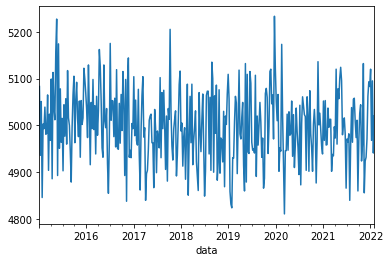

In [ ]:
data = dados_estoque['vendas-iogurte'].groupby(pd.to_datetime(dados_estoque['data'], infer_datetime_format=True).dt.to_period("D")).agg('sum') 
data.plot()

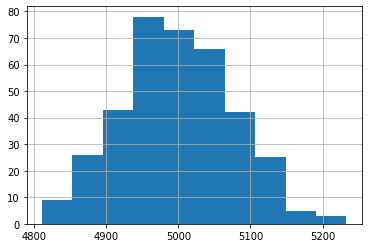

In [ ]:
dados_estoque['vendas-iogurte'].hist()

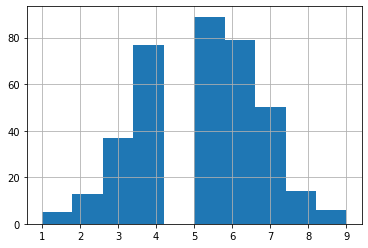

In [ ]:
dados_estoque['lead-time'].hist()

In [ ]:
nivel_servico=0.9987
## sem sazonalidade -> demanda=média
## qual o estoque de segurança?
z=norm.ppf(0.5+nivel_servico/2)


## PRECISO AGRUPAR DATAS POR MES ANTES (Para a venda de iorgurte foi feita a soma nos meses e para o leadtime foi feito a média dos leadtimes no mes)
dados_estoque['data'] = dados_estoque['data'].astype('datetime64')
dados_estoque['mes_ano'] = dados_estoque['data'].map(lambda x: 100*x.year + x.month)
vendas_mes_ano = dados_estoque.groupby(['mes_ano']).sum().reset_index()
leadtime_mes_ano = dados_estoque.groupby(['mes_ano']).mean().reset_index()

desvio_demanda=vendas_mes_ano['vendas-iogurte'].std()
desvio_leadtime=leadtime_mes_ano['lead-time'].std()/30
demanda=vendas_mes_ano['vendas-iogurte'].mean()
leadtime=leadtime_mes_ano['lead-time'].mean()/30
leadtime_dias=int(leadtime*30)
estoque_seguranca=int(z*np.sqrt((desvio_demanda**2)*leadtime+(desvio_leadtime**2)*(demanda**2)))
print(f'O estoque de segurança desejado para um nível de serviço de 99,87% é de {estoque_seguranca} unidades. \n Sendo a média de vendas mensais: {demanda:,.0f} unidades, desvio da demanda: {desvio_demanda:,.1f}, leadtime: {leadtime:,.1f} meses ({leadtime_dias} dias) e desvio do leadtime: {desvio_leadtime:,.2f}.')

O estoque de segurança desejado para um nível de serviço de 99,87% é de 3784 unidades. 
 Sendo a média de vendas mensais: 21,761 unidades, desvio da demanda: 2,442.0, leadtime: 0.2 meses (5 dias) e desvio do leadtime: 0.03.
